In [1]:
using Luxor, LightXML

In [2]:
pointradius = 6
linewidth = 2;

In [3]:
function textlabel!(parent, txt::AbstractString, pos::Point; xoffset::Number=0, yoffset::Number=0)
    x = pos.x + xoffset
    y = pos.y + yoffset
    elem = new_child(parent, "text")
    add_text(elem, txt)
    set_attributes(elem, Dict("class"=>"math", "x"=>string(x, "pt"), "y"=>string(y, "pt")))
    return nothing
end;

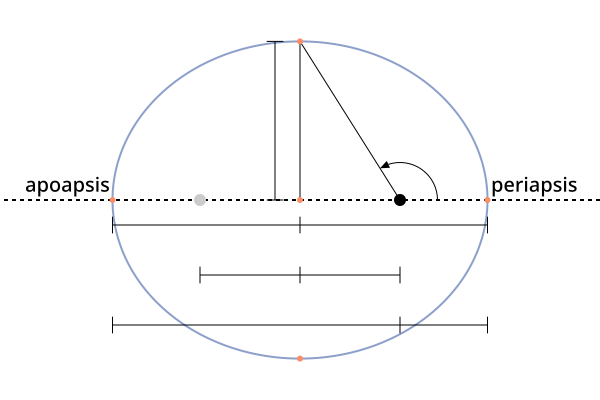

In [4]:
function ellipseorbit()
    drawing_height = 400
    drawing_width = 600
    Drawing(drawing_width, drawing_height, :svg)
    # box(O, Point(drawing_width, drawing_height), :stroke)
    bbox = BoundingBox(;centered=false)

    origin()
    @layer begin
        setdash("dash")
        rule(O)
    end

    semimajor = 5/16*drawing_width
    m1 = Point(100, 0)
    r_p = semimajor - m1.x
    e = 1 - r_p/semimajor
    semiminor = -semimajor * sqrt(1 - e^2)

    circle(m1, pointradius, :fill)
    @layer begin
        setcolor(141/255, 160/255, 203/255, 1.0)
        epoly = ellipse(m1, -m1, 2semimajor, vertices=true)
        poly(epoly, :stroke, close=true)
    end

    @layer begin
        setcolor("gray80")
        circle(-m1, pointradius, :fill)
    end

    B = Point(0, semiminor)
    angle = slope(m1, B)
    @layer begin
        setline(linewidth/2)
        line(m1, B, :stroke)
        arrow(m1, semimajor/5, 0, angle, clockwise=false, linewidth=linewidth/2)
        line(O, B, :stroke)
        offset = 25

        # Semi-major distance lines
        line(Point(-semimajor, offset), Point(semimajor, offset), :stroke)
        line(Point(semimajor, 2offset/3), Point(semimajor, 4*offset/3), :stroke)
        line(Point(-semimajor, 2offset/3), Point(-semimajor, 4*offset/3), :stroke)
        line(Point(0, 2offset/3), Point(0, 4*offset/3), :stroke)

        # Semi-minor distance line
        line(Point(-offset, semiminor), Point(-offset, 0), :stroke)
        line(Point(-2offset/3, 0), Point(-4offset/3, 0), :stroke)
        line(Point(-2offset/3, semiminor), Point(-4offset/3, semiminor), :stroke)

        # Center distance lines
        offset *= 3
        line(Point(-m1.x, offset), Point(m1.x, offset), :stroke)
        line(Point(-m1.x, 8offset/9), Point(-m1.x, 10offset/9), :stroke)
        line(Point(m1.x, 8offset/9), Point(m1.x, 10offset/9), :stroke)
        line(Point(0, 8offset/9), Point(0, 10offset/9), :stroke)

        offset *= 5/3
        # Apsis distance lines
        line(Point(-semimajor, offset), Point(semimajor, offset), :stroke)
        line(Point(semimajor, 14offset/15), Point(semimajor, 16*offset/15), :stroke)
        line(Point(-semimajor, 14offset/15), Point(-semimajor, 16*offset/15), :stroke)
        line(Point(m1.x, 14offset/15), Point(m1.x, 16*offset/15), :stroke)

        offset /= 5
    end

    @layer begin
        setcolor(252/255, 141/255, 98/255, 1.0)
        circle(semimajor, 0, pointradius/2, :fill)
        circle(-semimajor, 0, pointradius/2, :fill)
        circle(0, semiminor, pointradius/2, :fill)
        circle(0, -semiminor, pointradius/2, :fill)
        circle(O, pointradius/2, :fill)
    end

    fontface("Dejavu Sans")
    fontsize(20)
    # textwrap("Apse Line", 100, O)
    label("periapsis", :NE, Point(semimajor, 0))
    label("apoapsis", :NW, Point(-semimajor, 0))
    finish()
    svgout = svgstring()
    xdoc = parse_string(svgout)
    xroot = root(xdoc)
    textlabel!(xroot, "F", m1, xoffset=200, yoffset=155)
    textlabel!(xroot, "F'", -m1, xoffset=235, yoffset=155)
    textlabel!(xroot, "C", O, xoffset=210, yoffset=155)
    textlabel!(xroot, "\\beta", between(m1, B, 0.6), xoffset=290, yoffset=220)
    textlabel!(xroot, "B", B, xoffset=225, yoffset=175)
    textlabel!(xroot, "b", between(O, B, 0.5), xoffset=190, yoffset=175)
    textlabel!(xroot, "a", between(Point(-semimajor, offset), Point(0, offset), 0.5), xoffset=230, yoffset=155)
    textlabel!(xroot, "a", between(Point(semimajor, offset), Point(0, offset), 0.5), xoffset=205, yoffset=155)
    offset *= 3
    textlabel!(xroot, "c", between(Point(-m1.x, offset), Point(0, offset), 0.5), xoffset=230, yoffset=140)
    textlabel!(xroot, "c = ae", between(Point(m1.x, offset), Point(0, offset), 0.5), xoffset=205, yoffset=140)
    offset *= 5/3
    textlabel!(xroot, "r_a", between(Point(-semimajor, offset), Point(m1.x, offset), 0.5), xoffset=230, yoffset=125)
    textlabel!(xroot, "r_p", between(Point(m1.x, offset), Point(semimajor, offset), 0.5), xoffset=180, yoffset=125)
    save_file(xdoc, "../raw_svg/elliptical-orbit-definitions.svg");
end

ellipseorbit();
preview()